<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%203/MIS710_Lab3-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIS710 Lab 3 Week 3**
Authors: Associate Professor Lemai Nguyen and Thuc Nguyen

Objective: to learn and practise linear regression models with scikit-learn


**To do before the class:**
1. complete Labs 0, 1 and 2
2. learn Lecture 3: Supervised Machine Learning: Linear Regression
3. download the housing.csv dataset and store it in your Google drive, Colab folder, MIS710 folder. This is for Task 1.

**Student name:**

Student ID:

# **Task 1: House Price Prediction**

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset was modified to allow you deal with missing data.
**Download the modified data at the unit site.**

## **1.1 Import libraries**


In [1]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns



## **1.2 Mount your Google drive**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## **1.3 Load and inspect data**


1.   Load the dataset
2.   Inspect the data
3.   Initial cleansing



In [3]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 3/Housing3.csv")

url="https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%203/Housing3.csv"

records = pd.read_csv(url)

#Inspect the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   

In [4]:
##write your code to display info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              536 non-null    object
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          539 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  538 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 55.5+ KB
None


In [5]:
#You can view a dataframe shape using the attribute shape
print("\n*** Dataset shape: ", records.shape)


*** Dataset shape:  (545, 13)


**Initial cleansing**

Note data quality issue: area should be numeric. Let's fix it.

In [6]:
#area is wrongly documented as string, convert it to numeric
records['area'] = pd.to_numeric(records['area'], errors='coerce')

## **1.4 Inspect missing data**

The data preprocessing is cyclic with analysing and visualising data, handling missing data, and feature engineering. For the learning purpose, we show you some simple techniques, you should move between the activities yourself.

In [7]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in records.iloc[:,0:]:
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)

area missing:  10
bedrooms missing:  0
bathrooms missing:  0
stories missing:  0
mainroad missing:  6
guestroom missing:  0
basement missing:  0
hotwaterheating missing:  0
airconditioning missing:  0
parking missing:  0
prefarea missing:  0
furnishingstatus missing:  7
price missing:  0


In [8]:
#another way to find missing data is using the function isnull()
#read about isnull() here https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
#read further at https://www.sharpsightlabs.com/blog/pandas-isnull/
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     7
mainroad             6
bedrooms             0
bathrooms            0
stories              0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price                0
dtype: int64


## **1.5 Conduct Exploratory Data Analysis (EDA)**

**Summarise and visualise data**
1.  Univariate analysis
2.  Bivariate analysis
3.  Multivariate analysis




### **1.5.1 Univariate analysis**
Explore and visualise each variable at a time


**Explore numeric variables**

In [9]:
#overview of numeric data
records.describe()


,area,bedrooms,bathrooms,stories,parking,price
count,535.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5144.560748,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2183.710148,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3577.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4510.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [10]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,535.000,545.000,545.000,545.000,539,545,545,545,545,545.000,545,538,545.000
unique,NaN,NaN,NaN,NaN,2,2,3,2,3,NaN,3,4,NaN
top,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished,NaN
freq,NaN,NaN,NaN,NaN,464,448,354,520,372,NaN,416,222,NaN
mean,5144.561,2.965,1.286,1.806,NaN,NaN,NaN,NaN,NaN,0.694,NaN,NaN,4766729.248
std,2183.710,0.738,0.502,0.867,NaN,NaN,NaN,NaN,NaN,0.862,NaN,NaN,1870439.616
min,1650.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,1750000.000
25%,3577.000,2.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,3430000.000
50%,4510.000,3.000,1.000,2.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,4340000.000
75%,6360.000,3.000,2.000,2.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,5740000.000


In [11]:
#describe a numeric variable
records['area'].describe()

count     535.000
mean     5144.561
std      2183.710
min      1650.000
25%      3577.000
50%      4510.000
75%      6360.000
max     16200.000
Name: area, dtype: float64

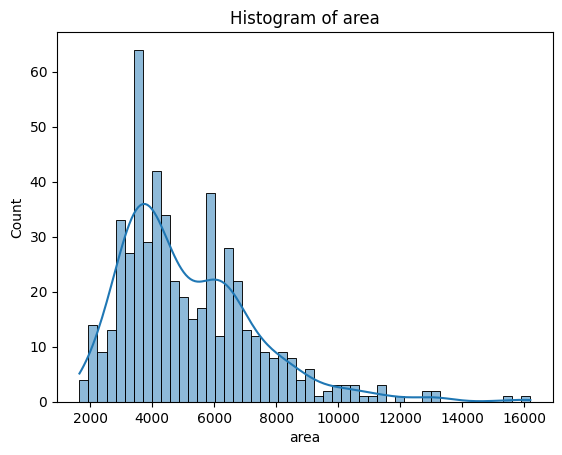

In [12]:
#visualise its distribution
sns.histplot(data=records, x='area', kde=True, bins=50)
plt.title(f"Histogram of area")
plt.show()

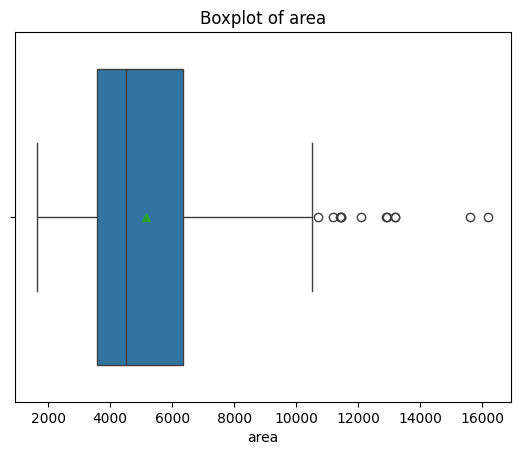

In [13]:
sns.boxplot(data=records, x='area', showmeans=True)
plt.title(f"Boxplot of area")
plt.show()

There are missing data in the variables area; let's examine the distribution above.

Area is skewed. Let's replace the missing data with median in SECTION 1.5.2

In [14]:
##write your code below to summarise the numeric variable price


count        545.000
mean     4766729.248
std      1870439.616
min      1750000.000
25%      3430000.000
50%      4340000.000
75%      5740000.000
max     13300000.000
Name: price, dtype: float64

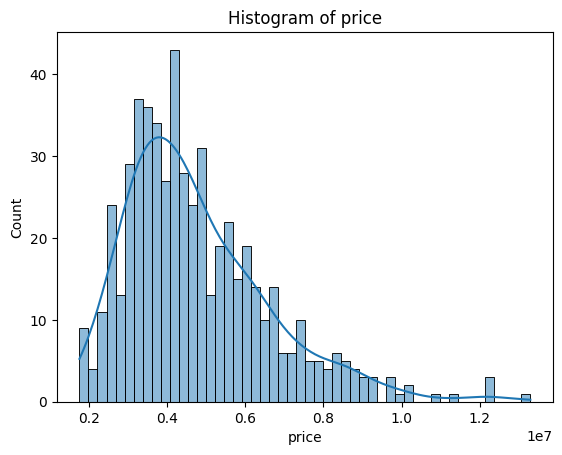

In [15]:
##write your code below to generate a histogram of price, hints: use histplot with arguments - data=records, x='price', kde=True, bins=50

plt.title(f"Histogram of price")
plt.show()

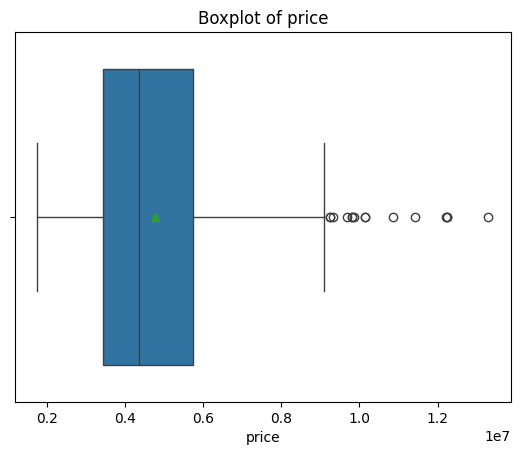

In [16]:
##write your code below to generate a boxplot of price

plt.title(f"Boxplot of price")
plt.show()

**Visualise multiple numerical variables using a loop**

Numerical Variables: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


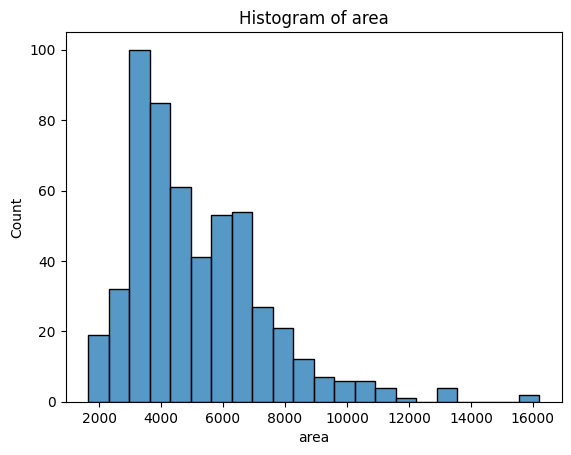

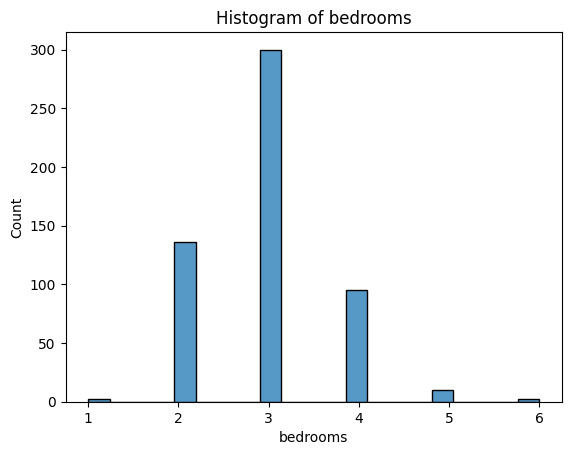

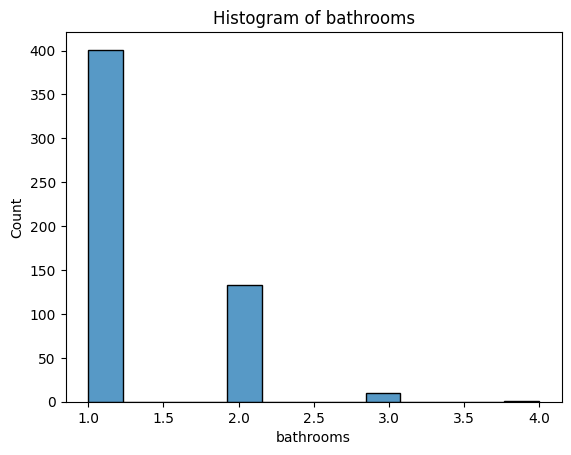

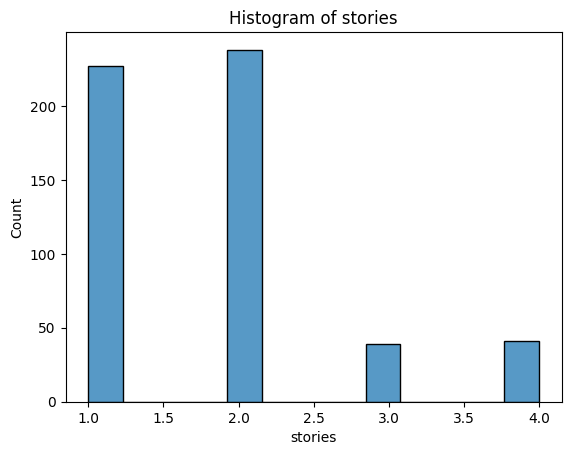

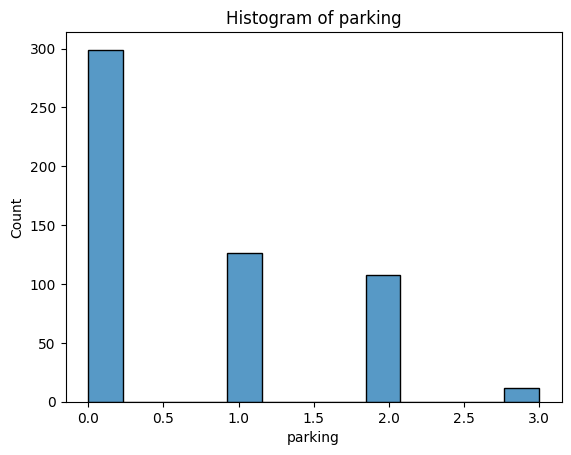

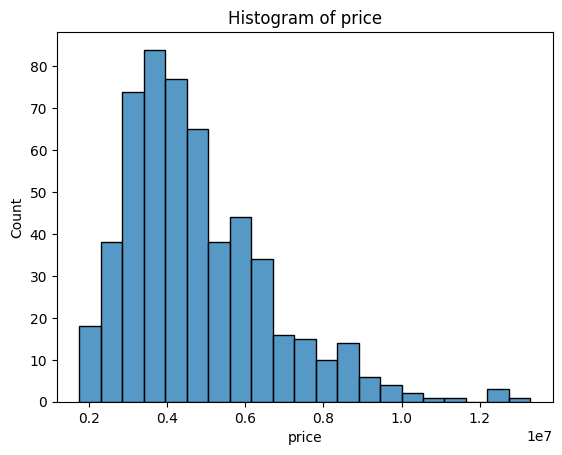

In [17]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records, x=variable)
    plt.title(f"Histogram of {variable}")
    plt.show()



**Explore categorical variables**

In [18]:
#explore each categorial variable
print(records['furnishingstatus'].value_counts())


furnishingstatus
semi-furnished    222
unfurnished       176
furnished         139
                    1
Name: count, dtype: int64


In [19]:
#find mode
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

Furnishing Status mode:  0    semi-furnished
Name: furnishingstatus, dtype: object


In [20]:
#you can also use the built-in function mode to see the most frequently seen values of categorical data;
#it returns a series, so get the first index, there can be more than one mode

print(records['furnishingstatus'].mode()[0])

semi-furnished


<Axes: xlabel='furnishingstatus', ylabel='count'>

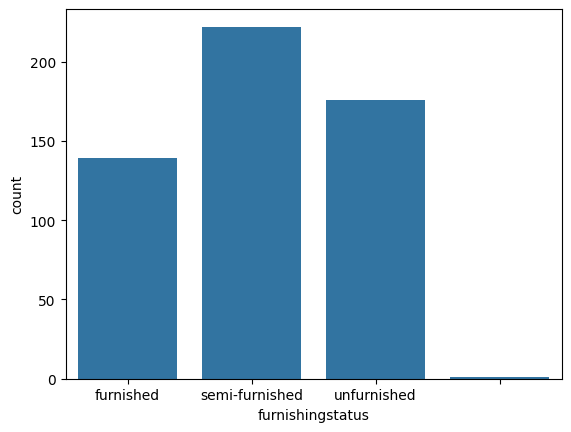

In [21]:
#summarise a categorical variable using a barchart (countplot)
sns.countplot(data=records, x='furnishingstatus')

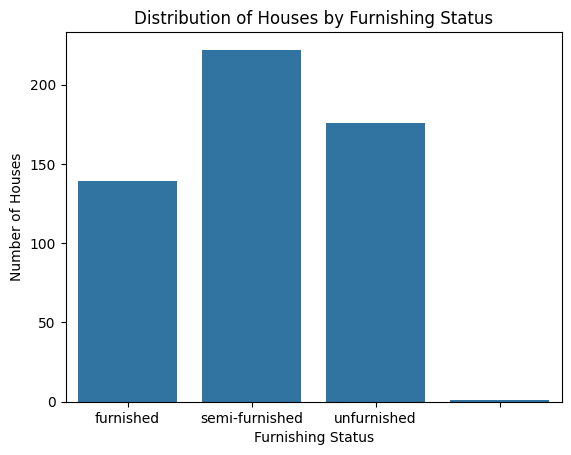

In [22]:
#you can add labels
sns.countplot(x=records['furnishingstatus'])
plt.xlabel('Furnishing Status')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Furnishing Status')
plt.show()

Mode is semi-furnished; Note the 'weird' category " " (a space). We have a data quality issue.  We need to cleanse this in SECTION 1.5.2

In [23]:
#write your code to print frequency of houses on mainroad and not on mainroad


mainroad
yes    464
no      75
Name: count, dtype: int64

In [24]:
#write your code to print mode of mainroad


yes


<Axes: xlabel='mainroad', ylabel='count'>

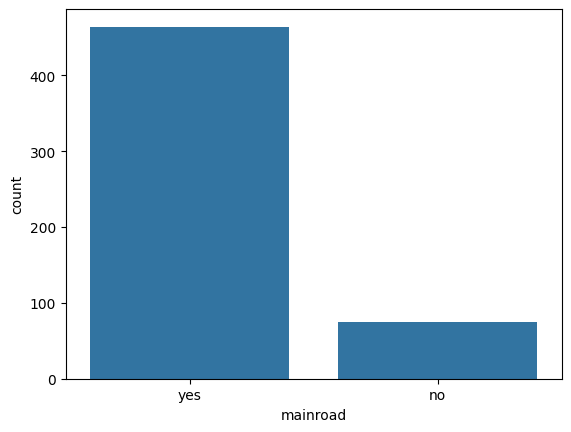

In [25]:
##write your code to generate a countplot for another categorical variable, such as mainroad


In [26]:
#write your code to explore another categorial variable, such as bathrooms


bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


In [27]:
#find mode
print('Most frequent number of bathrooms: ', records['bathrooms'].mode())

Most frequent number of bathrooms:  0    1
Name: bathrooms, dtype: int64


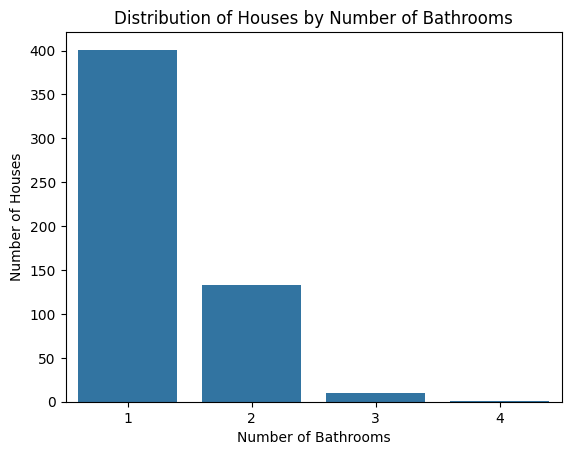

In [28]:
#write your code to visualise the barchart (countplot) of bathrooms

plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Number of Bathrooms')
plt.show()

**Visualise multiple categorical variables**

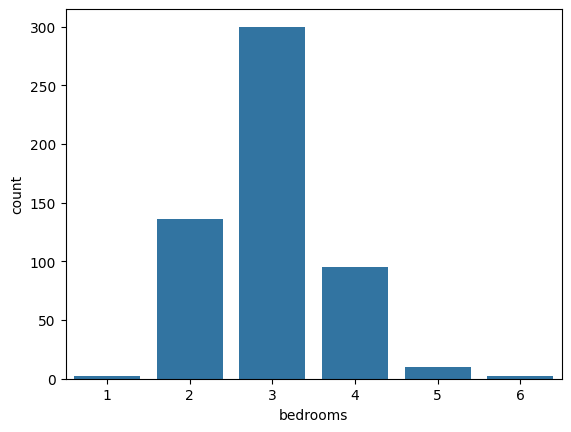

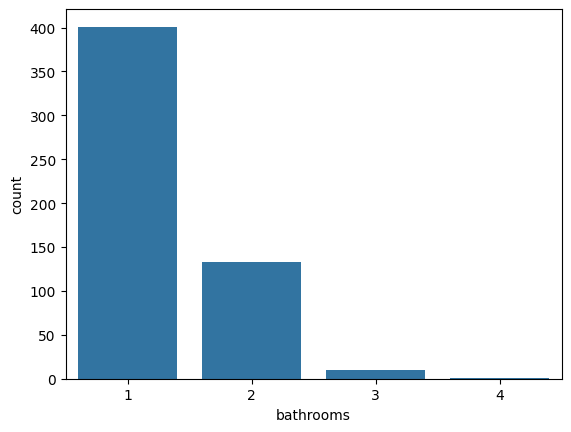

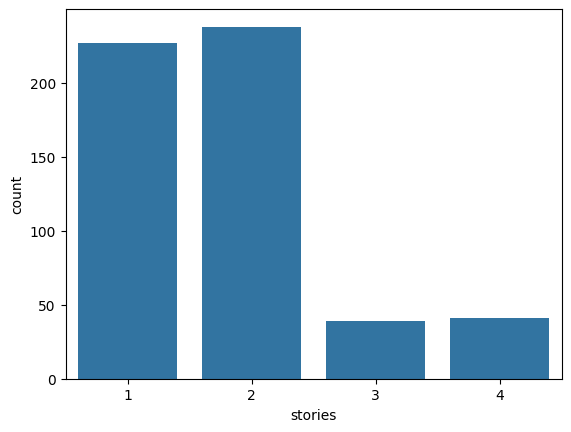

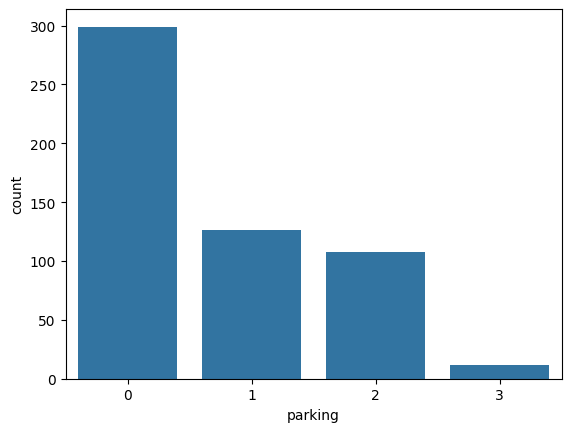

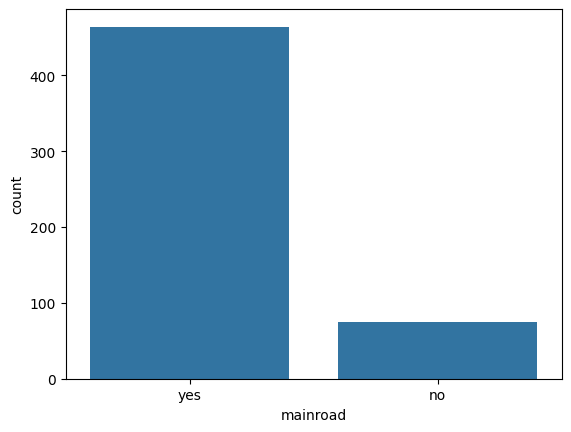

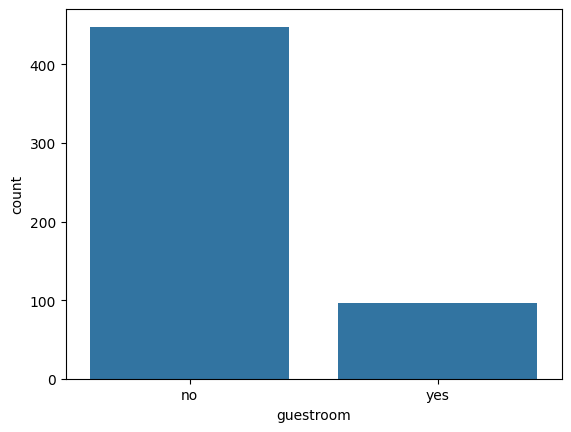

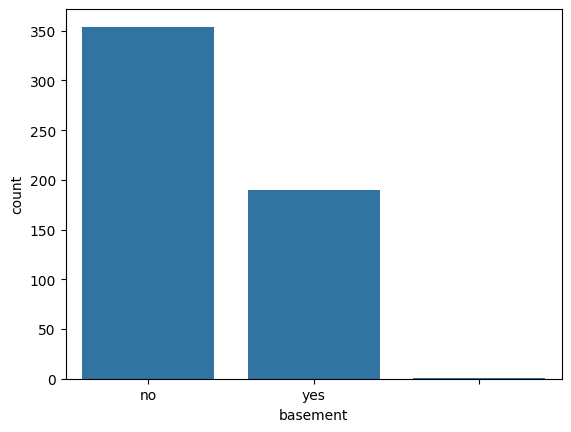

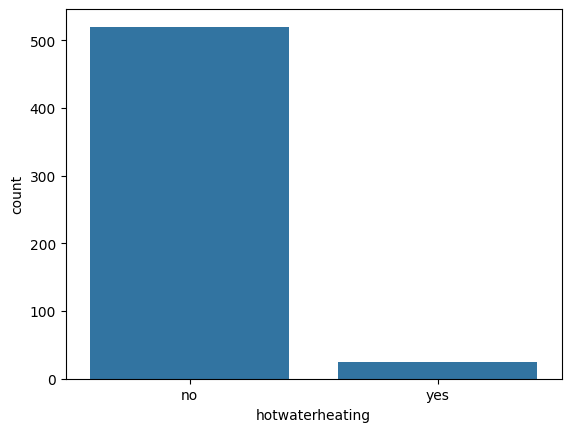

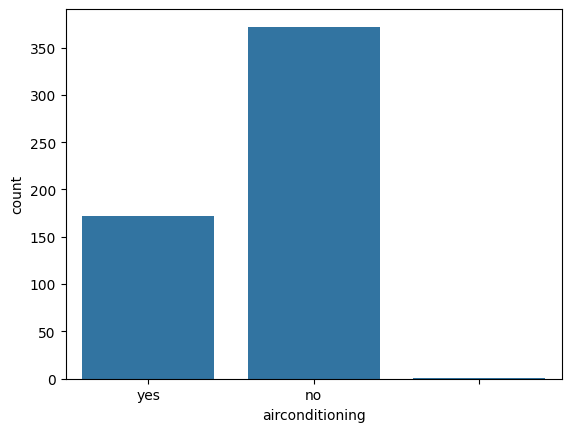

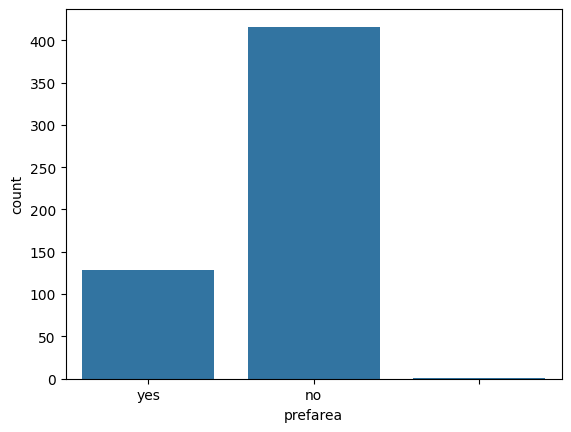

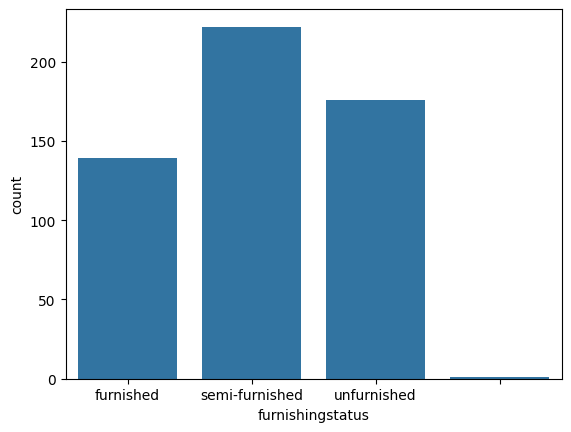

In [29]:
cat_variables = ['bedrooms', 'bathrooms','stories', 'parking','mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=records[i])


Note spaces are included in some catagorical variables. They should be treated as missing data.

### **1.5.2 Treat missing data**

In [30]:
# Replace empty strings (" ") with NaN
records.replace(" ", pd.NA, inplace=True)

In [31]:
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     8
mainroad             6
basement             1
airconditioning      1
prefarea             1
bedrooms             0
bathrooms            0
stories              0
guestroom            0
hotwaterheating      0
parking              0
price                0
dtype: int64


In [32]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].median(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #note, there can be more than one mode

records['mainroad'].fillna(records['mainroad'].mode()[0], inplace=True)


In [33]:
##write your code to replace missing categorical data with mode





In [34]:
print(records.isnull().sum().sort_values(ascending=0))

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


Now, rerun the analyses above with the cleansed dataset

### **1.5.3 Multivariate visualisation**

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='prefarea', ylabel='count'>

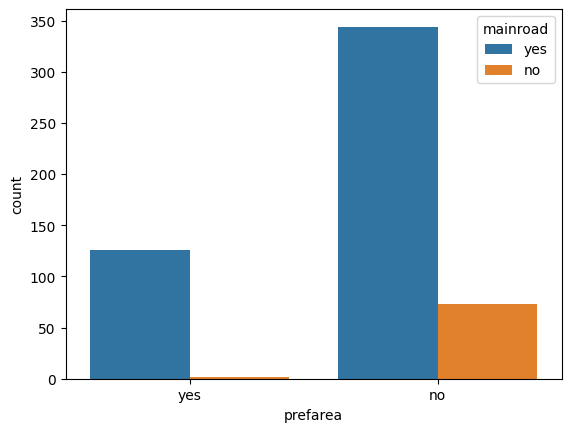

In [35]:
#frequency of houses in prefarea and not in prearea by mainroad
sns.countplot(data=records, x='prefarea', hue='mainroad')

<Axes: xlabel='furnishingstatus', ylabel='count'>

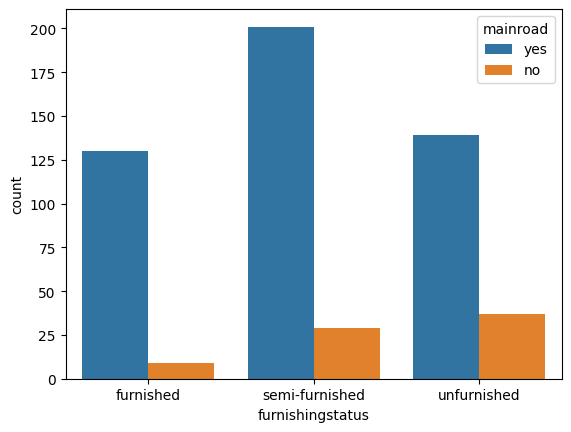

In [36]:
##write your code examine relationships between other categorical variables, eg furnishingstatus vs mainroad


**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='price', ylabel='furnishingstatus'>

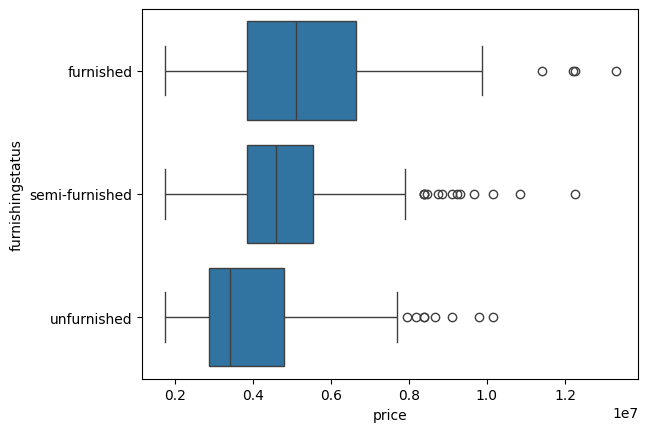

In [37]:
sns.boxplot(data=records, x='price', y='furnishingstatus')

<Axes: xlabel='price', ylabel='prefarea'>

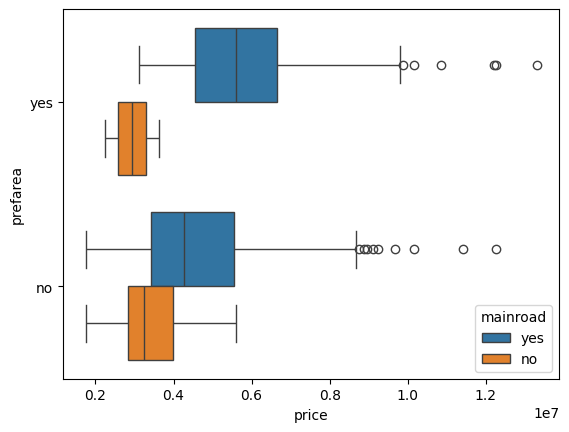

In [38]:
##write your code to examine boxplots of price by prefarea and mainroad, hint: using x=  y= and hue=


**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='area', ylabel='price'>

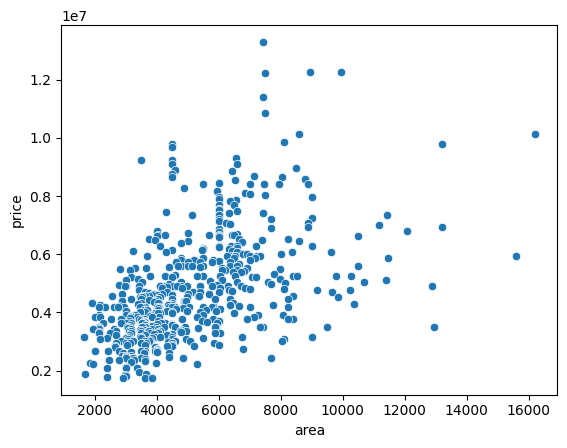

In [39]:
sns.scatterplot(data=records, x='area', y='price')

In [40]:
#define my own array of numeric variables of interest
numerical_variables  = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

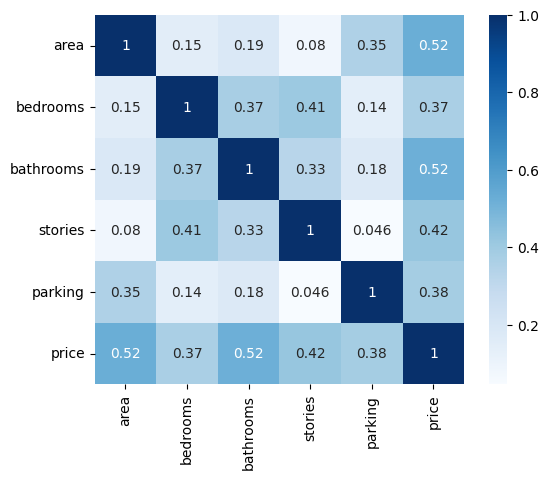

In [41]:
#generate heatmaps to explore relationships
sns.heatmap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True)
plt.show()

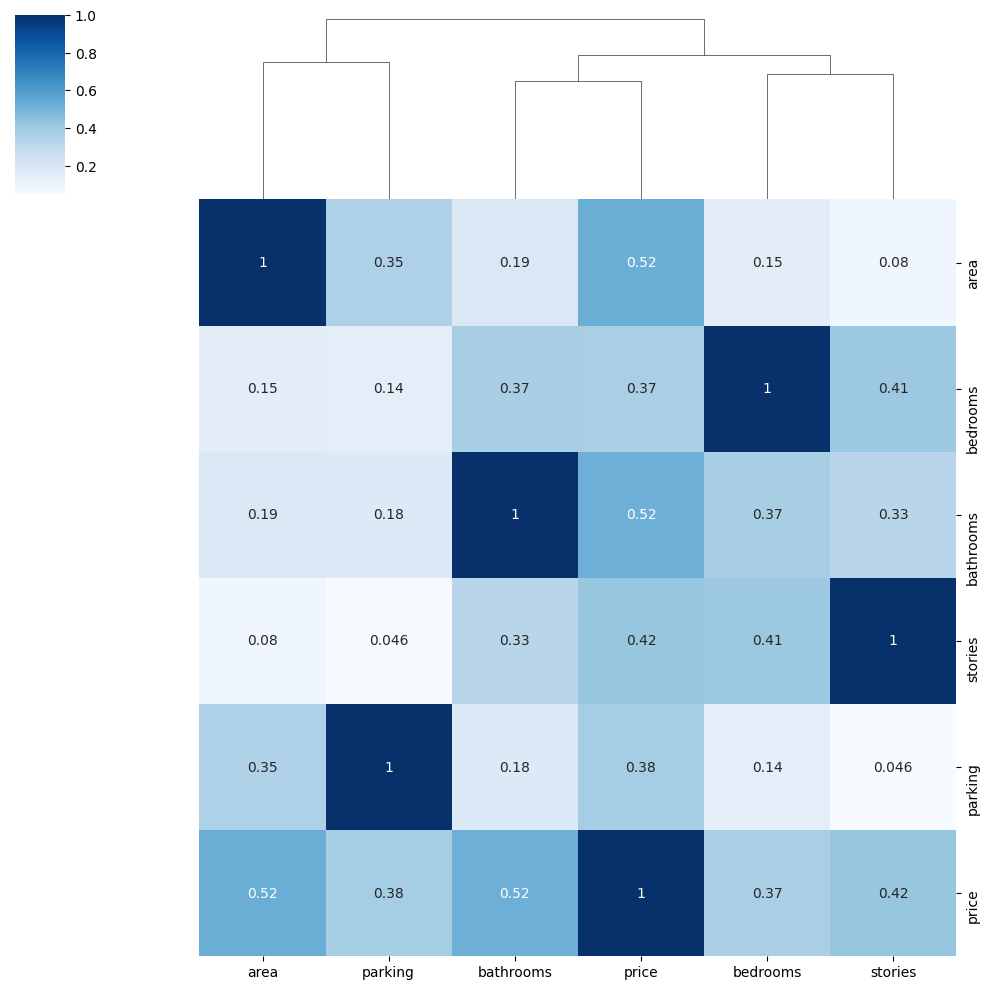

In [42]:
#generate dendrograms to show hierarchical clustering
sns.clustermap(records[numerical_variables].corr(), cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **1.7 Encoding data**

In [43]:
#OPTIONAL: If you want to do optional exercises to explore different ways to convert data, then store our datasets for these explorations later
records1=records
records2=records

In [44]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
None


In [45]:
#convert categorical variables to numeric
# Define the custom mapping
furnishing_mapping = {
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}
# Convert the categories to numerical values using replace()
records['furnishingstatus_N'] = records['furnishingstatus'].replace(furnishing_mapping)

In [46]:
other_cat_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert categorical variables into numeric using dummy encoding
records = pd.get_dummies(records, columns=other_cat_variables, drop_first=True)

In [47]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 545 non-null    float64
 1   bedrooms             545 non-null    int64  
 2   bathrooms            545 non-null    int64  
 3   stories              545 non-null    int64  
 4   parking              545 non-null    int64  
 5   furnishingstatus     545 non-null    object 
 6   price                545 non-null    int64  
 7   furnishingstatus_N   545 non-null    int64  
 8   mainroad_yes         545 non-null    bool   
 9   guestroom_yes        545 non-null    bool   
 10  basement_yes         545 non-null    bool   
 11  hotwaterheating_yes  545 non-null    bool   
 12  airconditioning_yes  545 non-null    bool   
 13  prefarea_yes         545 non-null    bool   
dtypes: bool(6), float64(1), int64(6), object(1)
memory usage: 37.4+ KB


In [48]:
records.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420.000,4,2,3,2,furnished,13300000,2,True,False,False,False,True,True
1,8960.000,4,4,4,3,furnished,12250000,2,True,False,False,False,True,False
2,9960.000,3,2,2,2,semi-furnished,12250000,1,True,False,True,False,False,True
3,7500.000,4,2,2,3,furnished,12215000,2,True,False,True,False,True,True
4,7420.000,4,1,2,2,furnished,11410000,2,True,True,True,False,True,False


### **Optional exercises**

**Option 2 to encode data**
Do this with the copy records1


In [49]:
#Last week, we learned to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records1['mainroad_N'] = encoder.fit_transform(records1['mainroad'])
records1['basement_N'] = encoder.fit_transform(records1['basement'])


In [50]:
#there are other ways of doing this, for example
records1['hotwaterheating_N'] = records1['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)

records1.sample(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N
118,6420.000,3,1,1,yes,no,yes,no,yes,0,yes,furnished,5950000,2,1,1,0
466,3090.000,3,1,2,no,no,no,no,no,0,no,semi-furnished,3010000,1,0,0,0
6,8580.000,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,10150000,1,1,0,0
61,8880.000,2,1,1,yes,no,no,no,yes,1,no,semi-furnished,7070000,1,1,0,0
390,2135.000,3,2,2,no,no,no,no,no,0,no,unfurnished,3500000,0,0,0,0
239,4000.000,3,1,2,yes,no,no,no,no,1,no,furnished,4585000,2,1,0,0
308,4046.000,3,1,2,yes,no,yes,no,no,1,no,semi-furnished,4165000,1,1,1,0
249,4990.000,4,2,2,yes,yes,yes,no,no,0,yes,furnished,4543000,2,1,1,0
209,6720.000,3,1,1,yes,no,no,no,no,0,no,semi-furnished,4900000,1,1,0,0
313,3680.000,3,2,2,yes,no,no,no,no,0,no,semi-furnished,4095000,1,1,0,0


In [51]:
#another way, defining your OWN function
#convert categorical data to numerical
def coding_furnishingstatus(x):
        if x=='furnished': return 3
        if x=='semi-furnished': return 2
        if x=='unfurnished': return 1

records1['furnishingstatus_N2'] = records1['furnishingstatus'].apply(coding_furnishingstatus)

records1.iloc[9:14]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N,furnishingstatus_N2
9,4510.000,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000,0,1,0,0,1
10,13200.000,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000,2,1,1,0,3
11,4510.000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,9681000,1,1,1,1,2
12,6550.000,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,9310000,1,1,0,0,2
13,3500.000,4,2,2,yes,no,no,yes,no,2,no,furnished,9240000,2,1,0,1,3


In [52]:
#write your code to drop redudant columns if you don't like this option



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                545 non-null    float64
 1   bedrooms            545 non-null    int64  
 2   bathrooms           545 non-null    int64  
 3   stories             545 non-null    int64  
 4   mainroad            545 non-null    object 
 5   guestroom           545 non-null    object 
 6   basement            545 non-null    object 
 7   hotwaterheating     545 non-null    object 
 8   airconditioning     545 non-null    object 
 9   parking             545 non-null    int64  
 10  prefarea            545 non-null    object 
 11  furnishingstatus    545 non-null    object 
 12  price               545 non-null    int64  
 13  furnishingstatus_N  545 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 59.7+ KB
None


**Option 3 to convert data types**
Do this on the copy records2

In [53]:
#Another way is getting all catagorical columns
cat_variables = records2.select_dtypes(include=['object']).columns
#Convert categorical columns to numeric
records2[cat_variables] = records2[cat_variables].apply(encoder.fit_transform)

# Display the updated dataset
records2.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N,furnishingstatus_N2
0,7420.000,4,2,3,1,0,0,0,1,2,1,0,13300000,2,1,0,0,3
1,8960.000,4,4,4,1,0,0,0,1,3,0,0,12250000,2,1,0,0,3
2,9960.000,3,2,2,1,0,1,0,0,2,1,1,12250000,1,1,1,0,2
3,7500.000,4,2,2,1,0,1,0,1,3,1,0,12215000,2,1,1,0,3
4,7420.000,4,1,2,1,1,1,0,1,2,0,0,11410000,2,1,1,0,3


**Moving columns and accessing rows**

In [54]:
#Let't move price to the first column
first_column=records.pop('price')
records.insert(0,'price',first_column)

In [55]:
records

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420.000,4,2,3,2,furnished,2,True,False,False,False,True,True
1,12250000,8960.000,4,4,4,3,furnished,2,True,False,False,False,True,False
2,12250000,9960.000,3,2,2,2,semi-furnished,1,True,False,True,False,False,True
3,12215000,7500.000,4,2,2,3,furnished,2,True,False,True,False,True,True
4,11410000,7420.000,4,1,2,2,furnished,2,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.000,2,1,1,2,unfurnished,0,True,False,True,False,False,False
541,1767150,2400.000,3,1,1,0,semi-furnished,1,False,False,False,False,False,False
542,1750000,3620.000,2,1,1,0,unfurnished,0,True,False,False,False,False,False
543,1750000,2910.000,3,1,1,0,furnished,2,False,False,False,False,False,False


In [56]:
records.iloc[9:14]

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
9,9800000,4510.000,3,2,4,1,unfurnished,0,True,True,False,False,True,True
10,9800000,13200.000,3,1,2,2,furnished,2,True,False,True,False,True,True
11,9681000,4510.000,4,3,2,2,semi-furnished,1,True,True,True,True,False,False
12,9310000,6550.000,4,2,2,1,semi-furnished,1,True,False,False,False,True,True
13,9240000,3500.000,4,2,2,2,furnished,2,True,False,False,True,False,False


## **1.8 Select features and target**

In [57]:
#feature selection
features=['area']
X=records[features]
X.head()

,area
0,7420.000
1,8960.000
2,9960.000
3,7500.000
4,7420.000


In [58]:
#specify the label
y=records['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## **1.9 Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [59]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


        area
187 6100.000
273 3500.000
316 5900.000
320 4320.000
231 4320.000
187    5110000
273    4340000
316    4060000
320    4060000
231    4690000
Name: price, dtype: int64
Training dataset size: (436, 1)
Test dataset size: (109, 1)


## **1.10 Training a Linear Regression Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Linear Regression https://scikit-learn.org/stable/modules/linear_model.html

LinearRegression will take in its fit method arrays X, y and will store the coefficients of the linear model in its coef_ member






In [60]:
#import linear_model
from sklearn import linear_model

#create a linear_model object
reg = linear_model.LinearRegression()

**Train a model**

In [61]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

**Make predictions using the model and the test set**

In [62]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test)


**Inspect the predictions and the original labels**

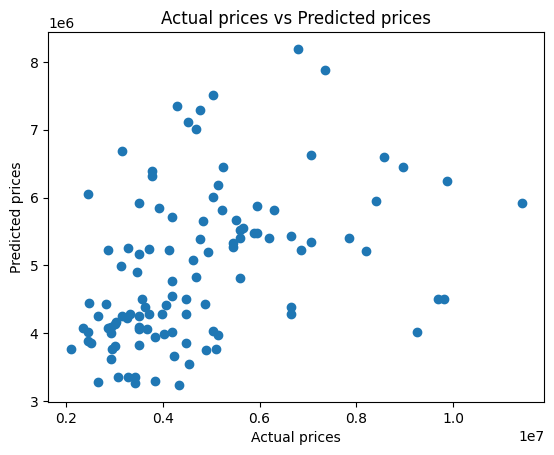

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [64]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,Area,Actual,Predicted
436,2145,3290000,3354825
310,5985,4130000,5222540
277,10360,4305000,7350470
61,8880,7070000,6630622
75,4260,6650000,4383527
347,3350,3836000,3940918
4,7420,11410000,5920501
68,6000,6860000,5229835
148,6360,5600000,5404934
475,3000,2961000,3770683


**Getting the Intercept and Coefficients**

In [65]:
print('%.2f' % reg.intercept_)
print('%.2f' % reg.coef_)
print('Price = ', '%.2f' % reg.intercept_, ' + ', '%.2f' % reg.coef_, ' * ', 'Area' )


2311530.78
486.38
Price =  2311530.78  +  486.38  *  Area


<ipython-input-65-aaa4f39c30de>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.2f' % reg.coef_)
<ipython-input-65-aaa4f39c30de>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Price = ', '%.2f' % reg.intercept_, ' + ', '%.2f' % reg.coef_, ' * ', 'Area' )


<Axes: xlabel='Area', ylabel='Predicted'>

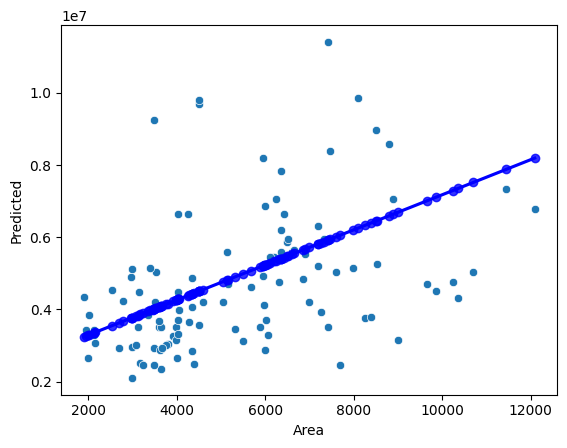

In [66]:
sns.scatterplot(data=inspection, x='Area', y='Actual')
sns.regplot(data=inspection, x='Area', y='Predicted', color='blue')

## **1.11 Performance evaluation**

In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.13


In [68]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 1310218


In [69]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1754838


In [70]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count        109
mean     4721436
std      1893118
min      2100000
25%      3430000
50%      4235000
75%      5523000
max     11410000
Name: Actual, dtype: float64

In [71]:
#Examine the descriptive stats of predicted price
inspection['Predicted'].describe()

count       109
mean    4928291
std     1119384
min     3238092
25%     4062514
50%     4548898
75%     5649098
max     8191915
Name: Predicted, dtype: float64

## **1.12 Multi-linear regression**
Repeat from the feature selection steps to create multiple linear regression model

### **1.12.1 Select features**

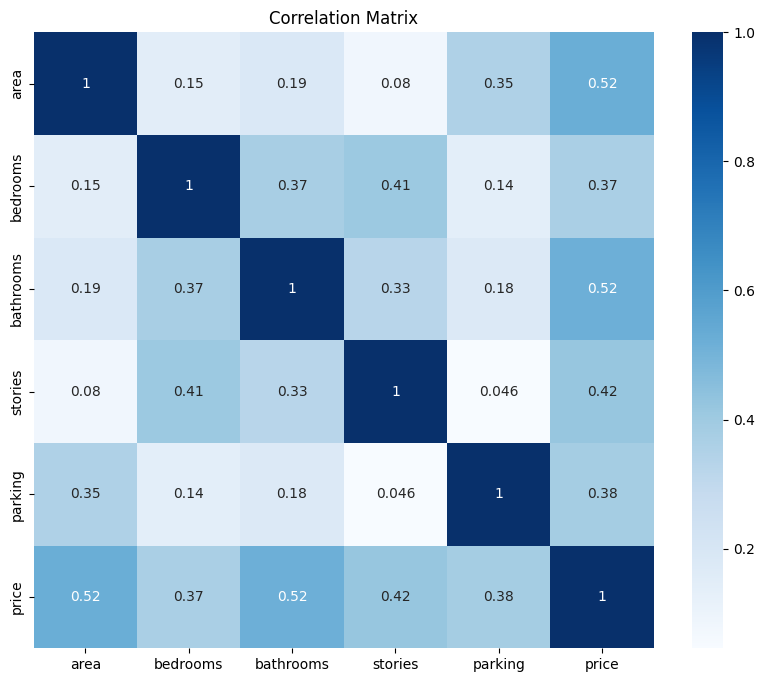

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(records[numerical_variables].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [73]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   area                 545 non-null    float64
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   parking              545 non-null    int64  
 6   furnishingstatus     545 non-null    object 
 7   furnishingstatus_N   545 non-null    int64  
 8   mainroad_yes         545 non-null    bool   
 9   guestroom_yes        545 non-null    bool   
 10  basement_yes         545 non-null    bool   
 11  hotwaterheating_yes  545 non-null    bool   
 12  airconditioning_yes  545 non-null    bool   
 13  prefarea_yes         545 non-null    bool   
dtypes: bool(6), float64(1), int64(6), object(1)
memory usage: 37.4+ KB


In [74]:
#select relevant features and train and evaluate a model. For example
features=['area','bedrooms', 'bathrooms','stories', 'parking','mainroad_yes','guestroom_yes','basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_N']
X=records[features]

In [75]:
#specify the label
y=records['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### **1.12.2 Split data**

In [76]:
from sklearn.model_selection import train_test_split # Import train_test_split function
#import linear_model
from sklearn import linear_model

In [77]:
##write your code to split dataset into training set 80% and test set 20%, see how we did it in SECTION 1.9


#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
187  6100         3          1        1        0          True          False   
273  3500         4          1        2        2          True          False   
316  5900         4          2        2        1         False          False   
320  4320         3          1        2        2          True          False   
231  4320         3          1        1        0          True          False   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
187          True                False                 True          True   
273         False                False                False         False   
316          True                False                False         False   
320         False                False                False          True   
231         False                False                False          True   

     furnishingstatus_N  
187                   1 

### **1.12.3. Train a linear model**

In [78]:
##write your code to create a linear_model object, see SECTION 1.10


In [79]:
##write your code to train a Regression model (regressor) with the training dataset, see SECTION 1.10


### **1.12.4 Make predictions**
Make predictions using the model and the test set

In [80]:
##write your code to make predictions for the test dataset, see SECTION 1.10



**Inspect the predictions and the original labels**

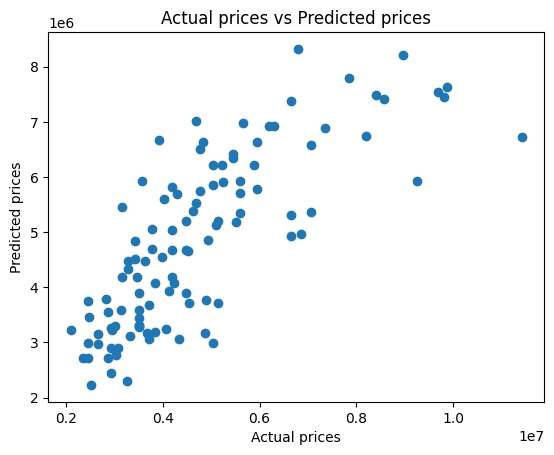

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [82]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,Area,Actual,Predicted
436,2145,3290000,4339552
310,5985,4130000,3931677
277,10360,4305000,5688958
61,8880,7070000,5357822
75,4260,6650000,5302567
347,3350,3836000,3197277
4,7420,11410000,6732278
68,6000,6860000,4963115
148,6360,5600000,5351403
475,3000,2961000,3221798


### **1.12.5 Performance evaluation**

In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.61


In [84]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 888667


In [85]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1177787


In [86]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count        109
mean     4721436
std      1893118
min      2100000
25%      3430000
50%      4235000
75%      5523000
max     11410000
Name: Actual, dtype: float64

In [87]:
#Examine the descriptive stats of predicted price
inspection['Predicted'].describe()

count       109
mean    4822460
std     1560780
min     2228858
25%     3310769
50%     4673476
75%     5932244
max     8321500
Name: Predicted, dtype: float64

In [88]:
# Print the features and their coefficients
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

area: 254.93
bedrooms: 112868.43
bathrooms: 1006918.30
stories: 433845.00
parking: 298403.93
mainroad_yes: 491236.53
guestroom_yes: 292152.02
basement_yes: 269897.26
hotwaterheating_yes: 526905.28
airconditioning_yes: 772493.33
prefarea_yes: 726336.29
furnishingstatus_N: 226614.05


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

In [91]:
# Convert boolean columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

In [92]:

# Add intercept for VIF calculation
X_vif = X.copy()
X_vif['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["variables"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs to two decimal places
for index, row in vif_data.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')


area: 1.31
bedrooms: 1.37
bathrooms: 1.29
stories: 1.48
parking: 1.21
mainroad_yes: 1.17
guestroom_yes: 1.21
basement_yes: 1.32
hotwaterheating_yes: 1.04
airconditioning_yes: 1.21
prefarea_yes: 1.15
furnishingstatus_N: 1.09
intercept: 27.02


**OPTIONAL: Calculate 95 Confidence Intervance**

In [93]:
# let's calculate 95CI for the y_pred, upper and lower bound

import numpy as np
from scipy import stats

# Calculate the standard error of the prediction
std_error = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate the critical value for a 95% confidence interval
z_critical = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the upper and lower bounds of the confidence interval
upper_bound = y_pred + z_critical * std_error
lower_bound = y_pred - z_critical * std_error

print(f"  95% Confidence Interval:: {z_critical * std_error:.2f}")


  95% Confidence Interval:: 2308419.70


In [94]:
# prompt: add upper and lower bound to inspection

inspection['Upper Bound'] = upper_bound
inspection['Lower Bound'] = lower_bound

# Display the inspection DataFrame with the new columns
print(inspection.head(20))


     Area    Actual  Predicted  Upper Bound  Lower Bound
436  2145   3290000    4339552      6647971      2031132
310  5985   4130000    3931677      6240096      1623257
277 10360   4305000    5688958      7997377      3380538
61   8880   7070000    5357822      7666242      3049403
75   4260   6650000    5302567      7610987      2994147
347  3350   3836000    3197277      5505697       888857
4    7420  11410000    6732278      9040697      4423858
68   6000   6860000    4963115      7271534      2654695
148  6360   5600000    5351403      7659823      3042984
475  3000   2961000    3221798      5530218       913379
62   6240   7070000    6577929      8886348      4269509
271  1905   4340000    3059919      5368339       751499
490  4350   2835000    3786277      6094697      1477857
534  3000   2100000    3220921      5529341       912501
30   7475   8400000    7492761      9801181      5184342
103  6350   6195000    6920695      9229115      4612276
13   3500   9240000    5932244 

**OPTIONAL: An alternative regression algorithm**

In [95]:
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso(alpha=1.0)

# Fit the model using the training data
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Print the features and their coefficients
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


area: 254.92832800088917
bedrooms: 112867.64721402556
bathrooms: 1006915.7916468912
stories: 433845.2764857609
parking: 298403.5697842785
mainroad_yes: 491228.78689231304
guestroom_yes: 292147.6551154489
basement_yes: 269895.8471185439
hotwaterheating_yes: 526880.6441155216
airconditioning_yes: 772488.7375069088
prefarea_yes: 726332.1882438628
furnishingstatus_N: 226613.88570227267


# **HOMEWORK Task 2: Insurance cost estimation**

**Do it yourself:** Repeat the above steps with the insurance dataset to consilidate your learning

## **2.1 Import libraries**

In [96]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

## **2.2 Load dataset**

In [97]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = "https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%203/insurance.csv"

df = pd.read_csv(url)


## **2.3 EDA**

* How many rows and columns in the dataset?
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values?
* How to deal with categorical features?
* Any strong correlation from the dataset?  
* What are the stats for the `charges`? Plot overall distribution of `charges`; and ditribution of chareges for smoker and non-smokers. Practice more with `bmi`, `age` and `sex` variables.



In [98]:
# How many rows and columns in the dataset?
df

# Return the first n rows.
df.head()

# What are the columns and their datatypes?
df.info()

# Is there any missing values?
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

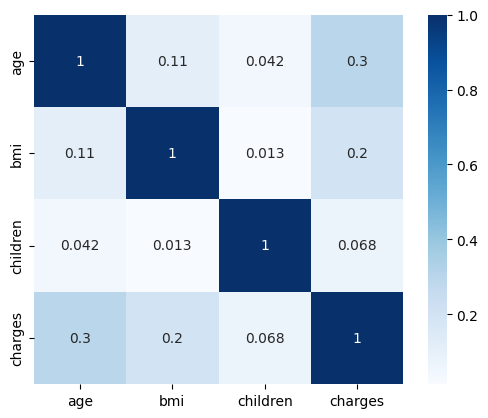

In [99]:
# Correlation plot
sns.heatmap(df[['age','bmi','children','charges']].corr(), square=True, cmap='Blues', annot=True)
plt.show()

In [100]:
# How to deal with categorical features?

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


In [101]:
'''
What are the stats for the charges? Plot overall distribution of charges;
and ditribution of chareges for smoker and non-smokers.
'''
df.charges.describe()

count    1338
mean    13270
std     12110
min      1122
25%      4740
50%      9382
75%     16640
max     63770
Name: charges, dtype: float64

<Axes: >

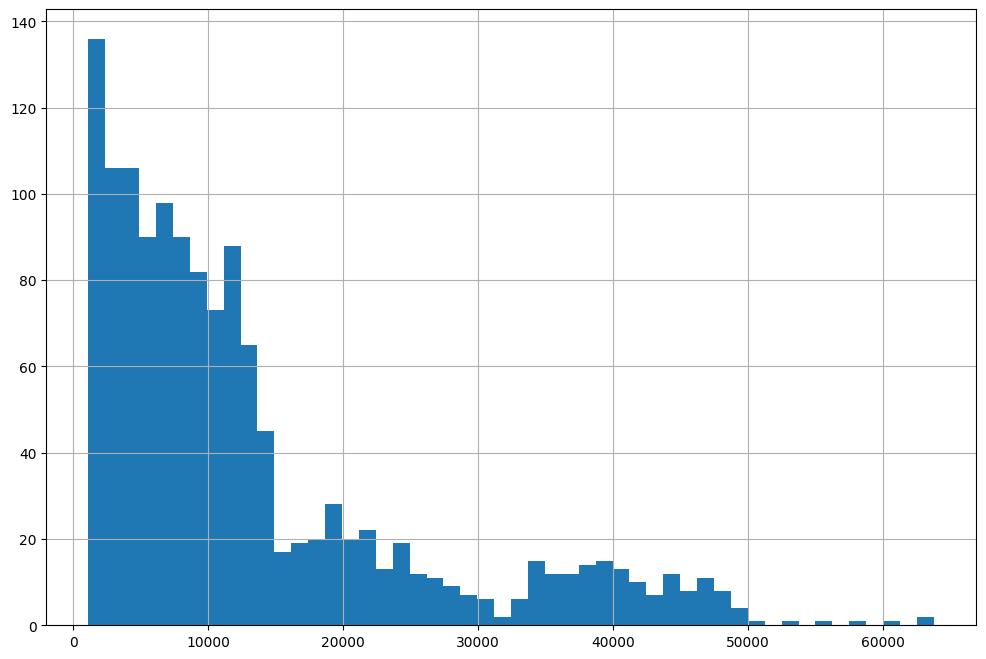

In [102]:
df.charges.hist(bins=50, figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

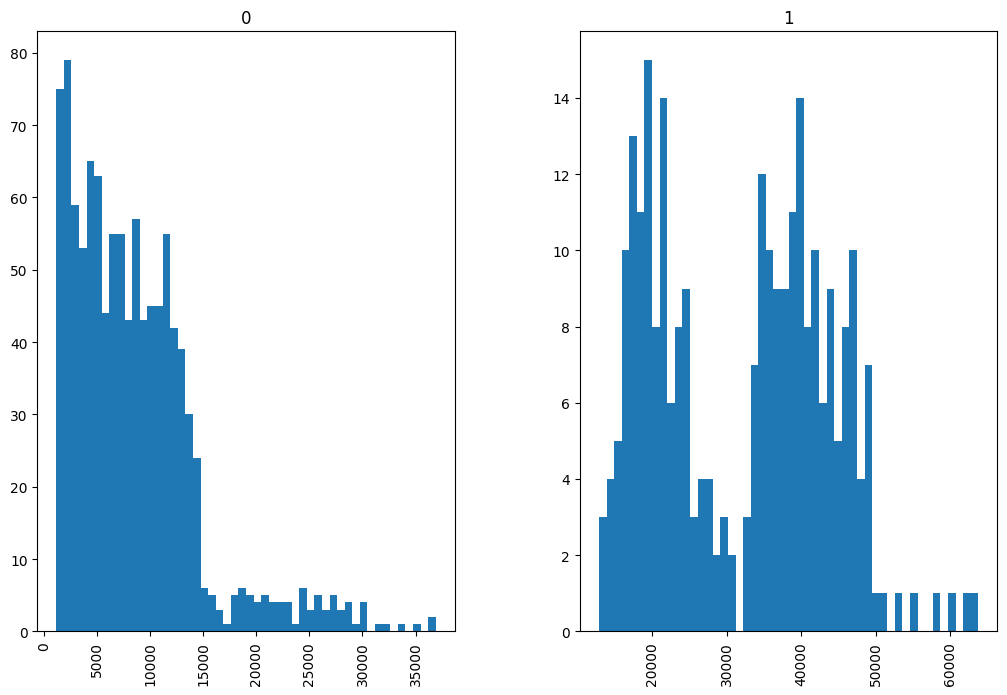

In [103]:
df.charges.hist(by=df.smoker, bins=50, figsize=(12,8))

<ipython-input-104-c051c0ca3e97>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
<ipython-input-104-c051c0ca3e97>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

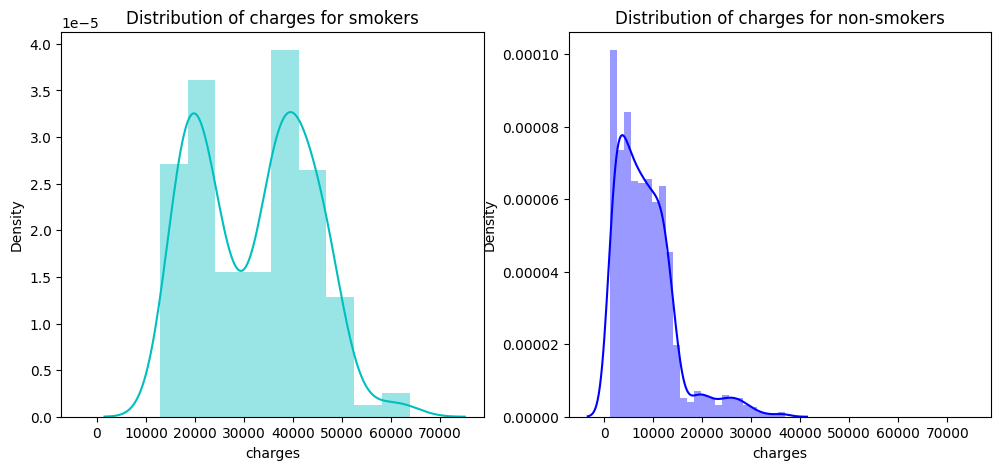

In [104]:
# Alternative using seaborn

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122, sharex = ax)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## **2.4 Select features and target**


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



In [105]:
X = df.drop(['charges'], axis = 1)
y = df.charges



## **2.5 Split data**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## **2.6 Model implementation**

1. Try with the original data. What's the performance?
2. Let's add data normalisation. Has the performance been improved?

### **2.6.1 Linear Regression**

In [107]:
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 37729580.5098492, MSE_Test: 31845929.13415943, MAE_Train: 4235.3838760320905, MAE_Test: 3930.3332739011403
R2 train data: 0.737, R2 test data: 0.800


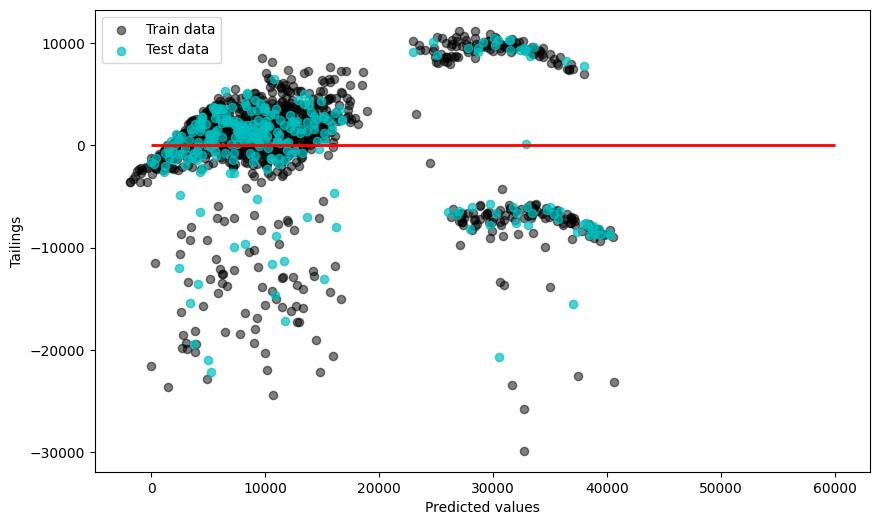

In [108]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

###**2.6.2 Polynomial regression**

In [109]:
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state = 0)

plr = LinearRegression().fit(X_train, y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 25433291.52096092, MSE_Test: 20604105.936189223, MAE_Train: 3182.5267476915888, MAE_Test: 3015.054654958955
R2 train data: 0.823, R2 test data: 0.871


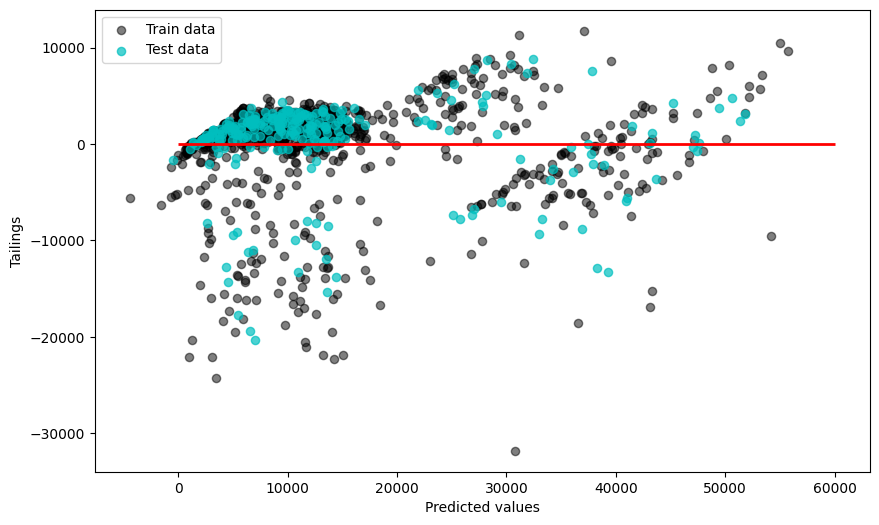

In [110]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()